In [1]:
import os
import json
import pandas as pd
import numpy as np
from datetime import datetime
import re
import cv2
from read_jsons import * # read_jsons.py
from get_image_files import * # get_image_files.py
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
webcoos_token = os.getenv('WebCOOS')
print('WebCOOS token:', webcoos_token)

WebCOOS token: None


We need data frome the shoreline JSONs to test the standard `create_video()` method for time-lapse overlay of the detected shorelines with their respective images.

The shorelines detected for `oakisland_west` are obtained with similar method that is scaled and in operation at:
- axiom URL
- 


In [2]:
station_name = 'oakisland_west'
# Instantiate the ShorelineDataProcessor class
processor = ShorelineDataProcessor(station_name)
# Get the shoreline coordinates DataFrame
shoreline_coords_df = processor.get_shoreline_coords()
sld17 = shoreline_coords_df.loc['2023-12-17':'2023-12-17'].copy()
sld17.dropna(axis=1,inplace=True)

# Get & Process Shoreline Images

In [3]:
# station_name = 'oakisland_west'
station_name = 'jennette_north'
# station_name = 'currituck_hampton_inn'
getImg = GetImages(station_name)

In [4]:
getImg.get_image_dir()

'../images/jennette_north/'

In [5]:
getImg.set_image_type('timex')

'../images/jennette_north/timex/'

In [6]:
getImg.get_image_list()[:5]

['jennette_north-2024-05-01-101014Z-timex.jpeg',
 'jennette_north-2024-05-01-110501Z-timex.jpeg',
 'jennette_north-2024-05-01-120501Z-timex.jpeg',
 'jennette_north-2024-05-01-130500Z-timex.jpeg',
 'jennette_north-2024-05-01-140500Z-timex.jpeg']

In [7]:
getImg.parse_image_datetime()[:5]

['2024-05-01 10:10:14',
 '2024-05-01 11:05:01',
 '2024-05-01 12:05:01',
 '2024-05-01 13:05:00',
 '2024-05-01 14:05:00']

In [8]:
getImg.create_image_df().tail()

,Image
Datetime,
2024-07-31 22:57:46,jennette_north-2024-07-31-225746Z-timex.jpeg
2024-07-31 23:05:04,jennette_north-2024-07-31-230504Z-timex.jpeg
2024-07-31 23:15:30,jennette_north-2024-07-31-231530Z-timex.jpeg
2024-07-31 23:22:17,jennette_north-2024-07-31-232217Z-timex.jpeg
2024-07-31 23:31:40,jennette_north-2024-07-31-233140Z-timex.jpeg


In [9]:
getImg.image_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 2024-05-01 10:10:14 to 2024-07-31 23:31:40
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   1240 non-null   object
dtypes: object(1)
memory usage: 19.4+ KB


In [10]:
# dt_range = getImg.get_date_range('2023-12-17 00:00:00', '2023-12-18 00:00:00')
dt_range = getImg.get_date_range('2024-07-24 00:00:00', '2024-08-01 00:00:00')
dt_range[:5]

Index(['2024-07-24 00:00:28', '2024-07-24 10:22:01', '2024-07-24 11:22:00',
       '2024-07-24 12:12:00', '2024-07-24 13:01:11'],
      dtype='object', name='Datetime')

In [11]:
getImg.get_image_range(dt_range).tail()

,Image
Datetime,
2024-07-31 22:57:46,jennette_north-2024-07-31-225746Z-timex.jpeg
2024-07-31 23:05:04,jennette_north-2024-07-31-230504Z-timex.jpeg
2024-07-31 23:15:30,jennette_north-2024-07-31-231530Z-timex.jpeg
2024-07-31 23:22:17,jennette_north-2024-07-31-232217Z-timex.jpeg
2024-07-31 23:31:40,jennette_north-2024-07-31-233140Z-timex.jpeg


In [12]:
imgs = getImg.get_images()

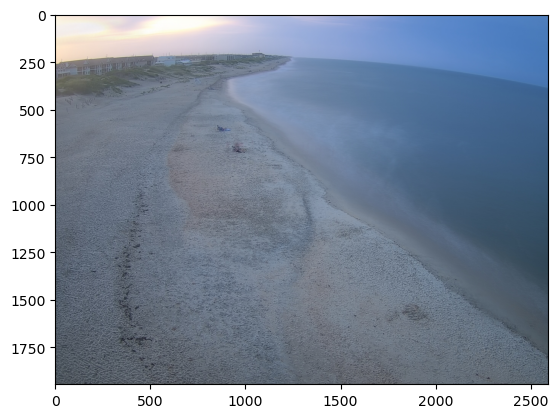

In [13]:
first_image_bgr = imgs[dt_range[0]]

# Convert BGR to RGB for correct display
first_image_rgb = cv2.cvtColor(first_image_bgr, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(first_image_rgb)
plt.show()

In [14]:
# get the first image in the dictionary
imgs[list(imgs.keys())[0]].shape

(1944, 2592, 3)

In [15]:
for key, value in imgs.items():
    print(key, value.shape)
    

2024-07-24 00:00:28 (1944, 2592, 3)
2024-07-24 10:22:01 (1944, 2592, 3)
2024-07-24 11:22:00 (1944, 2592, 3)
2024-07-24 12:12:00 (1944, 2592, 3)
2024-07-24 13:01:11 (1944, 2592, 3)
2024-07-24 13:47:16 (1944, 2592, 3)
2024-07-24 14:38:58 (1944, 2592, 3)
2024-07-24 16:28:13 (1944, 2592, 3)
2024-07-24 17:04:07 (1944, 2592, 3)
2024-07-24 17:19:25 (1944, 2592, 3)
2024-07-24 17:38:03 (1944, 2592, 3)
2024-07-24 18:48:41 (1944, 2592, 3)
2024-07-24 19:07:58 (1944, 2592, 3)
2024-07-24 19:31:36 (1944, 2592, 3)
2024-07-24 19:54:09 (1944, 2592, 3)
2024-07-24 20:50:52 (1944, 2592, 3)
2024-07-24 21:33:44 (1944, 2592, 3)
2024-07-24 22:15:28 (1944, 2592, 3)
2024-07-24 22:51:22 (1944, 2592, 3)
2024-07-24 23:28:31 (1944, 2592, 3)
2024-07-25 10:23:10 (1944, 2592, 3)
2024-07-25 11:23:11 (1944, 2592, 3)
2024-07-25 12:05:13 (1944, 2592, 3)
2024-07-25 12:54:08 (1944, 2592, 3)
2024-07-25 13:46:50 (1944, 2592, 3)
2024-07-25 14:42:16 (1944, 2592, 3)
2024-07-25 15:42:16 (1944, 2592, 3)
2024-07-25 16:21:37 (1944, 2

In [16]:
getImg.resize_images(scale_percent=30)
for key, value in getImg.scaled_images.items():
    print(key, value.shape)

2024-07-24 00:00:28 (583, 777, 3)
2024-07-24 10:22:01 (583, 777, 3)
2024-07-24 11:22:00 (583, 777, 3)
2024-07-24 12:12:00 (583, 777, 3)
2024-07-24 13:01:11 (583, 777, 3)
2024-07-24 13:47:16 (583, 777, 3)
2024-07-24 14:38:58 (583, 777, 3)
2024-07-24 16:28:13 (583, 777, 3)
2024-07-24 17:04:07 (583, 777, 3)
2024-07-24 17:19:25 (583, 777, 3)
2024-07-24 17:38:03 (583, 777, 3)
2024-07-24 18:48:41 (583, 777, 3)
2024-07-24 19:07:58 (583, 777, 3)
2024-07-24 19:31:36 (583, 777, 3)
2024-07-24 19:54:09 (583, 777, 3)
2024-07-24 20:50:52 (583, 777, 3)
2024-07-24 21:33:44 (583, 777, 3)
2024-07-24 22:15:28 (583, 777, 3)
2024-07-24 22:51:22 (583, 777, 3)
2024-07-24 23:28:31 (583, 777, 3)
2024-07-25 10:23:10 (583, 777, 3)
2024-07-25 11:23:11 (583, 777, 3)
2024-07-25 12:05:13 (583, 777, 3)
2024-07-25 12:54:08 (583, 777, 3)
2024-07-25 13:46:50 (583, 777, 3)
2024-07-25 14:42:16 (583, 777, 3)
2024-07-25 15:42:16 (583, 777, 3)
2024-07-25 16:21:37 (583, 777, 3)
2024-07-25 17:13:10 (583, 777, 3)
2024-07-25 17:

In [17]:
getImg.norm_rmb_images(scale=False)

In [18]:
getImg.otsu_threshold()

otsu_norm type: <class 'dict'>


In [19]:
getImg.image_gradient()

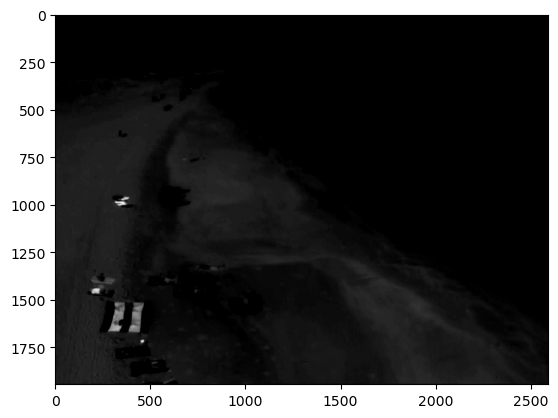

In [20]:
# plot the otsu threshold image
plt.imshow(getImg.norm_rmb[dt_range[4]], cmap='gray')

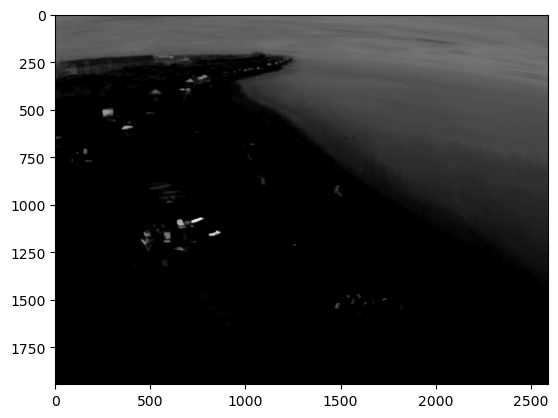

In [21]:
# show normalized bmr image
plt.imshow(getImg.norm_bmr[dt_range[10]], cmap='gray')

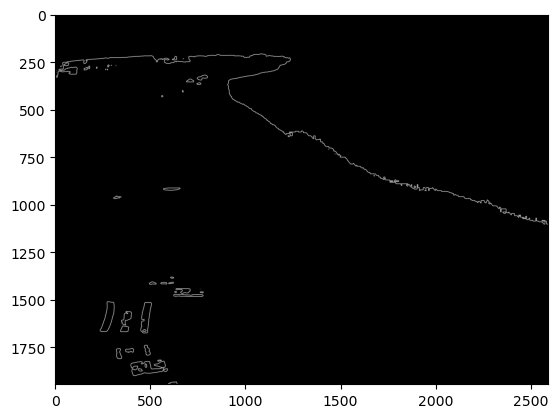

In [22]:
# plot first gradient image
plt.imshow(getImg.image_gradients[list(getImg.image_gradients.keys())[4]], cmap='gray')

In [23]:
getImg.gradient_mask(scale=False)

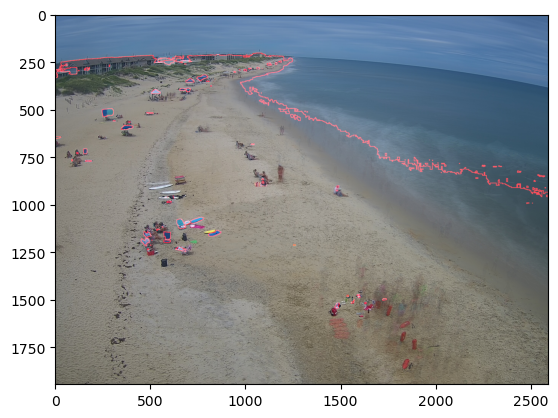

In [24]:

first_masked_image = getImg.gradient_masks[dt_range[10]]
# Convert BGR to RGB for correct display
first_masked_rgb = cv2.cvtColor(first_masked_image, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(first_masked_rgb)
plt.show()

In [25]:
# getImg.gradient_video(output_video='gradient_video_jennette.mp4', fps=10)

In [26]:
# getImg.gradient_timelapse(output_video='gradient_bmr_timelapse_currituck.mp4', fps=10)
# getImg.gradient_timelapse(output_video='gradient_rmb_timelapse_currituck.mp4', fps=10)
# getImg.gradient_timelapse(output_video='gradient_bmr_timelapse_jennette.mp4', fps=10)
# getImg.gradient_timelapse(output_video='gradient_rmb_timelapse_oakisland_west.mp4', fps=10)

In [27]:
# getImg.create_video(sld17, output_video='timex_video_scaled30.mp4', fps=10, scale_percent=30)
 # technically we can reverse the scaling on the original transection data which was implemented for operation/production purposes
 # Instead of scaling the image down, we scale all the transection data up to match the original image size
 # this means scaling both the column headers and row values
# getImg.create_video(sld17, output_video='timex_video_scaled30.mp4', fps=10, scale_percent=30)

How does the average RBG intensity for each image effect the RminusB vs. BminusR methods.

# Post Processed Detected Shoreline Time-lapse Videos
The following video link will take you to a youtube time-lapse.


## Jennette Time-lapse

[![Watch the video](https://img.youtube.com/vi/OH0Zoz2ayac/maxresdefault.jpg
)](https://youtu.be/OH0Zoz2ayac)


## Oak Island West Time-lapse
[![Watch the video](https://img.youtube.com/vi/lFR8cGO38n4/maxresdefault.jpg
)](https://youtu.be/lFR8cGO38n4)



# Currituck Hampton Inn Time-lapse
[![Watch the video](https://img.youtube.com/vi/qCO_ftlARIo/maxresdefault.jpg
)](https://youtu.be/qCO_ftlARIo)
